# Logisitc regression

Logistic regression for the MNIST dataset.

## 1. Data preprocessing

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [2]:
digits = load_digits()

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [5]:
images = digits['data']
labels = digits['target'].reshape(-1,1)

In [6]:
images = images / 255

In [7]:
print(images.shape, labels.shape)

(1797, 64) (1797, 1)


/Users/raphaelperri/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


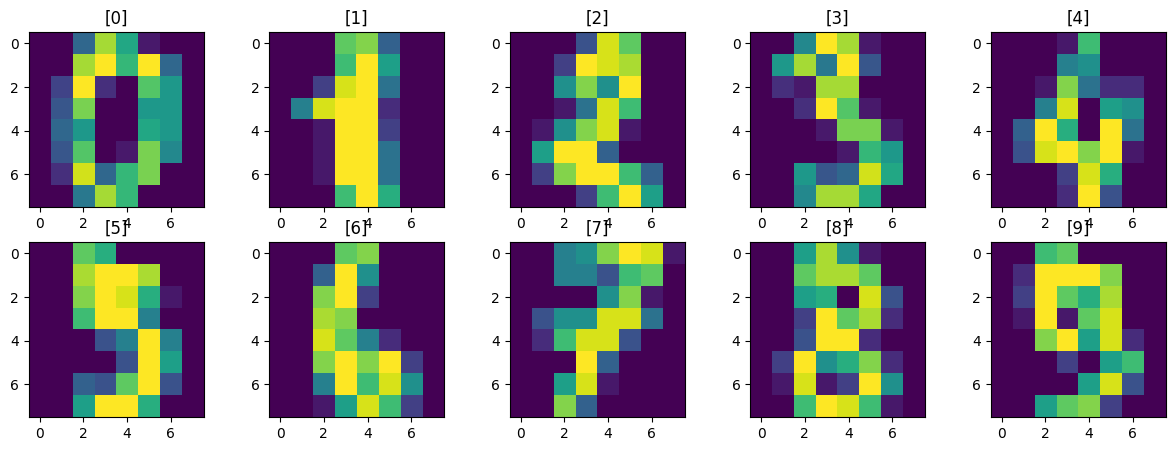

In [8]:
fig, ax = plt.subplots(2, 5, figsize=(15, 5))

for i in range(10):
    if i<5:
        ax[0, i].imshow(images[i].reshape(8, 8))
        ax[0, i].set_title(labels[i])
    else:
        ax[1, i - 5].imshow(images[i].reshape(8, 8))
        ax[1, i - 5].set_title(labels[i])

In [13]:
# Train, test split
X_train, X_test, y_train_temp, y_test_temp = train_test_split(images, labels, test_size=0.2, random_state=42)

In [16]:
# One hot-encoding for output
y_train = np.zeros((y_train_temp.shape[0], np.unique(y_train_temp).shape[0]))
for i in range(y_train_temp.shape[0]):
    y_train[i, y_train_temp[i]] = 1

y_test = np.zeros((y_test_temp.shape[0], np.unique(y_test_temp).shape[0]))
for i in range(y_test_temp.shape[0]):
    y_test[i, y_test_temp[i]] = 1

## 2. Training functions

In [9]:
def sigmoid_f(x):
    return 1 / (1 + np.exp(-x))

In [10]:
def bce(y_true, y_pred):
    return - np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [11]:
def grad_bce(x, y, theta):
    y_pred = sigmoid_f(np.dot(x, theta))
    errors = y_pred - y
    gradient = np.dot(x.T, errors)
    return gradient

In [27]:
def accuracy(y_true, y_pred):
    acc = 0
    n = len(y_pred)
    y_pred = np.array([e.argmax() for e in y_pred])
    for i in range(n):
        if y_pred[i] == y_true[i]:
            acc += 1
    return acc / n

## 3. Training

In [44]:
# Learning rate
alpha = 0.1
# Iterations
n = 500
# Initialize the parameters
theta = np.zeros(X_train.shape[1]).reshape(-1,1)
# Training loss
losses = []

In [45]:
for k in range(n):
    y_pred = sigmoid_f(np.dot(X_train, theta))
    loss = bce(y_train, y_pred)
    losses.append(loss)
    theta = theta - alpha * grad_bce(X_train, y_train, theta)
    print(f'Iteration {k+1}: BCE = {loss:.4f}')

Iteration 1: BCE = 0.6931
Iteration 2: BCE = 0.3177
Iteration 3: BCE = 0.3066
Iteration 4: BCE = 0.2965
Iteration 5: BCE = 0.2872
Iteration 6: BCE = 0.2785
Iteration 7: BCE = 0.2703
Iteration 8: BCE = 0.2625
Iteration 9: BCE = 0.2552
Iteration 10: BCE = 0.2483
Iteration 11: BCE = 0.2419
Iteration 12: BCE = 0.2358
Iteration 13: BCE = 0.2300
Iteration 14: BCE = 0.2246
Iteration 15: BCE = 0.2195
Iteration 16: BCE = 0.2146
Iteration 17: BCE = 0.2100
Iteration 18: BCE = 0.2057
Iteration 19: BCE = 0.2016
Iteration 20: BCE = 0.1977
Iteration 21: BCE = 0.1939
Iteration 22: BCE = 0.1904
Iteration 23: BCE = 0.1871
Iteration 24: BCE = 0.1839
Iteration 25: BCE = 0.1808
Iteration 26: BCE = 0.1779
Iteration 27: BCE = 0.1751
Iteration 28: BCE = 0.1724
Iteration 29: BCE = 0.1699
Iteration 30: BCE = 0.1674
Iteration 31: BCE = 0.1651
Iteration 32: BCE = 0.1628
Iteration 33: BCE = 0.1607
Iteration 34: BCE = 0.1586
Iteration 35: BCE = 0.1566
Iteration 36: BCE = 0.1547
Iteration 37: BCE = 0.1528
Iteration 

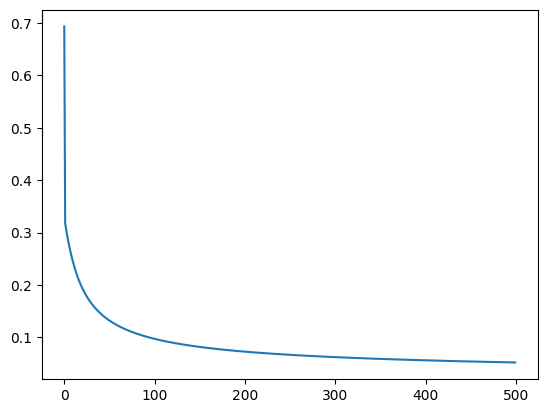

In [46]:
plt.plot(range(n), losses)

In [47]:
y_pred = sigmoid_f(np.dot(X_test, theta))

In [48]:
loss_test = bce(y_test, y_pred)
acc_test = accuracy(y_test_temp, y_pred)

print(f'Loss: {loss_test:.4f}')
print(f'Accuracy: {acc_test:.4f}')

Loss: 0.0503
Accuracy: 0.9528


## 4. Comparison with scikit-learn

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
lr = LogisticRegression()

In [51]:
lr.fit(X_train, y_train_temp)

/Users/raphaelperri/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [52]:
y_test_pred = lr.predict(X_test)

In [53]:
loss_test_sk = bce(y_test, y_pred)
acc_test_sk = accuracy(y_test_temp, y_pred)

print(f'Loss: {loss_test_sk:.4f}')
print(f'Accuracy: {acc_test_sk:.4f}')

Loss: 0.0503
Accuracy: 0.9528


In [54]:
print(f'Loss difference between our model and scikit-learn model: {loss_test - loss_test_sk}')
print(f'Accuracy difference between our model and scikit-learn model: {acc_test - acc_test_sk}')

Loss difference between our model and scikit-learn model: 0.0
Accuracy difference between our model and scikit-learn model: 0.0
